Notebook to count particles on .tif files

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import trackpy 
import pims
from pims import ImageSequence
import trackpy as tp

In [2]:
plt.rcParams['figure.figsize'] = (5, 5)

In [157]:
image_file = r'E:\Ingmar\Ingmar\Experimental_data\14092022\Stuck\1_1000\001.tif'

In [158]:
print(image_file)

E:\Ingmar\Ingmar\Experimental_data\14092022\Stuck\1_1000\001.tif


In [159]:
im = Image.open(image_file)
# im.show()

In [160]:
Img = plt.imread(image_file)

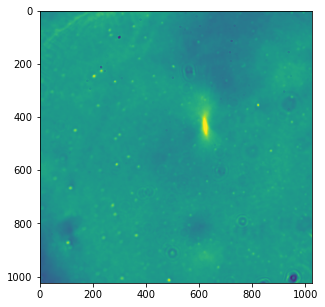

In [161]:
plt.imshow(Img)

Text(0.5, 1.0, 'Stuck image of emulsion dilution 1: 1000 | 1 of 4')

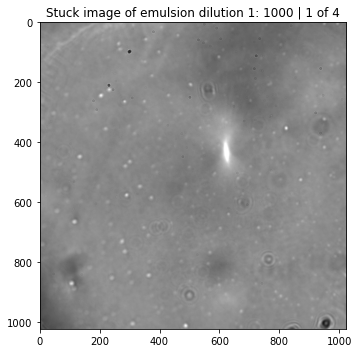

In [162]:
plt.imshow(Img, cmap='gray')
plt.tight_layout()
plt.title('Stuck image of emulsion dilution 1: 1000 | 1 of 4')
# plt.savefig('11.jpg')

In [163]:
count_image = tp.locate(Img, 5, minmass=3000, separation=30)
# count_image = tp.locate(Img, 5, separation=15)

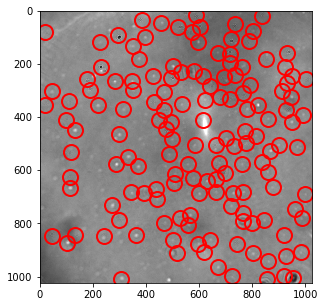

146


In [164]:
tp.annotate(count_image, Img);
print(len(count_image['mass']))

Text(0, 0.5, 'Number of particles')

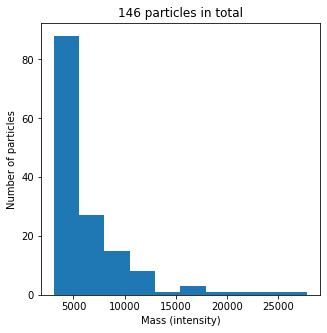

In [165]:
plt.hist(count_image['mass'])
plt.title('146 particles in total')
plt.xlabel('Mass (intensity)')
plt.ylabel('Number of particles')

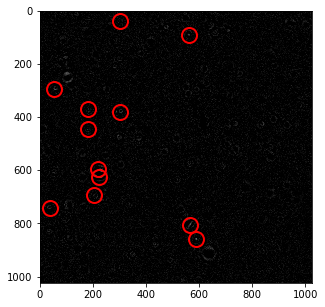

12


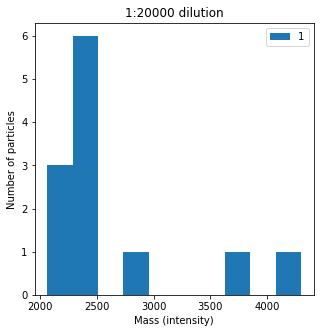

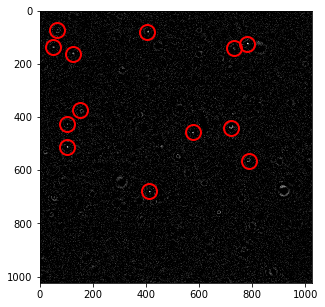

13


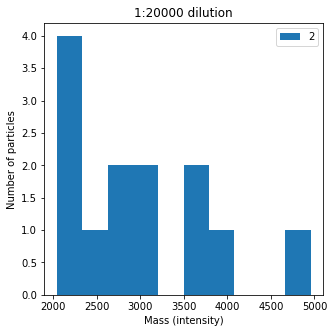

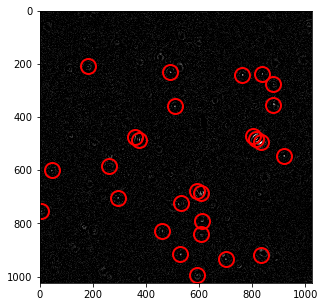

27


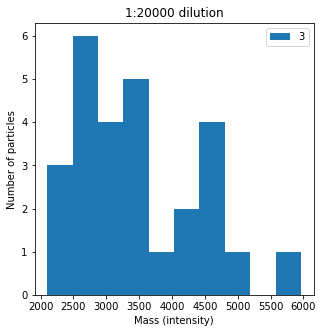

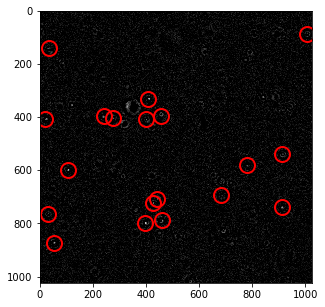

19


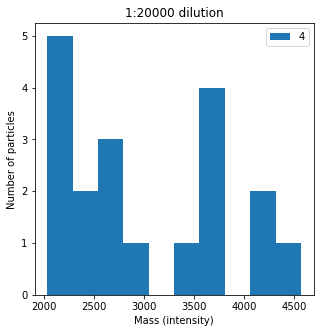

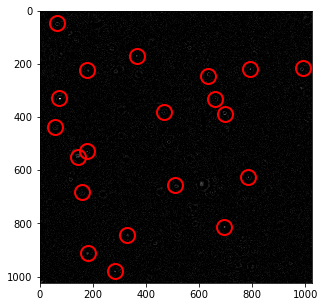

20


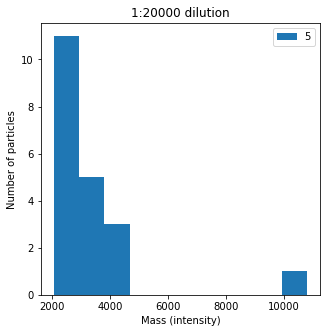

In [25]:
for i in range(1, 6):
    image_file = rf'E:\Ingmar\Ingmar\Experimental_data\25082022\1_50000\Overview{i}.tif'
    Img = plt.imread(image_file)
    count_image = tp.locate(Img, 5, minmass=2000, separation=15)
    tp.annotate(count_image, Img);
    print(len(count_image['mass']))
    plt.hist(count_image['mass'], label=i)
    plt.title('1:20000 dilution')
    plt.xlabel('Mass (intensity)')
    plt.ylabel('Number of particles')
    plt.legend()
    plt.show()

In [12]:
images = ImageSequence(r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview*.tif')

In [13]:
length = len(images)
print(length)

11


In [14]:
@pims.pipeline
def gray(image):
    return image[:, :]

In [15]:
frames1 = gray(pims.open(r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview*.tif'))

In [16]:
frames1
nf1 = len(frames1)
print(nf1)

11


In [17]:
plt.rcParams['figure.figsize'] = (7, 7)

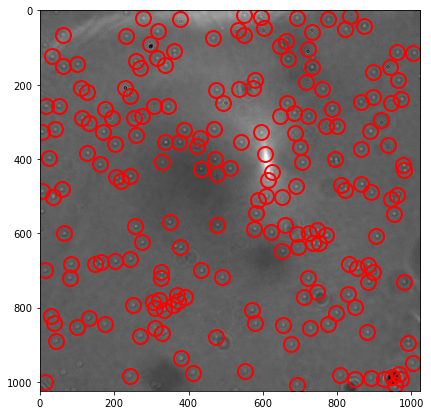

203


In [18]:
image_file = r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_60000\Overview00013.tif'
Img = plt.imread(image_file)
count_image = tp.locate(Img, 5, minmass=4000, separation=15)
tp.annotate(count_image, Img);
print(len(count_image['mass']))

(array([20., 24., 33., 48., 54., 17.,  1.,  3.,  1.,  2.]),
 array([ 4020.11908189,  5506.96654664,  6993.81401138,  8480.66147613,
         9967.50894087, 11454.35640562, 12941.20387036, 14428.05133511,
        15914.89879985, 17401.7462646 , 18888.59372934]),
 <BarContainer object of 10 artists>)

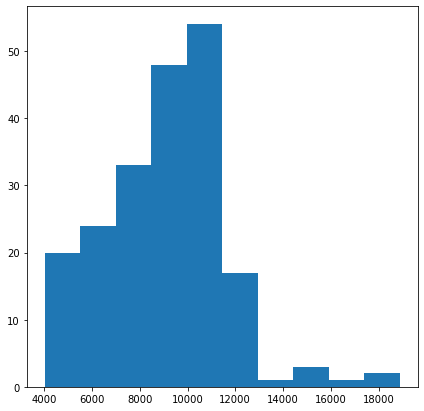

In [19]:
plt.hist(count_image['mass'])

The following data obtained

In [20]:
counts1 = [174, 191, 181, 209, 153]
counts2 = [26, 42, 87, 72, 87]
counts3 = [49, 70, 52, 60, 45]
counts4 = [48, 38, 44, 39, 37]
counts5 = [7, 19, 35, 26, 31]
counts6 = [17, 14, 17, 8, 13]

In [21]:
average1 = np.average(counts1)
average2 = np.average(counts2)
average3 = np.average(counts3)
average4 = np.average(counts4)
average5 = np.average(counts5)
average6 = np.average(counts6)

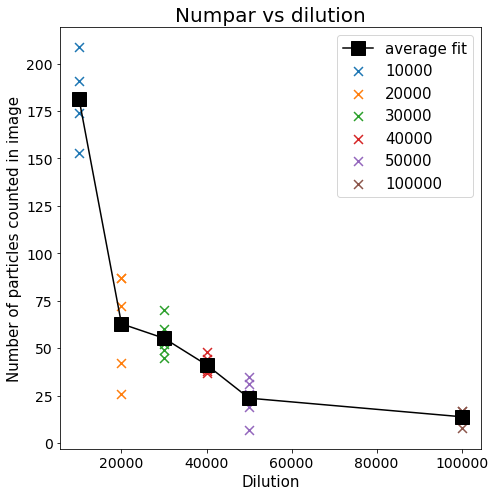

In [22]:
yvalues = [(174, 191, 181, 209, 153),
           (26, 42, 87, 72, 87),
           (49, 70, 52, 60, 45),
           (48, 38, 44, 39, 37),
           (7, 19, 35, 26, 31),
           (17, 14, 17, 8, 13)]

averagelist = [average1, average2, average3, average4, average5, average6]

xvalues = [10000, 20000, 30000, 40000, 50000, 100000]

for xe, ye in zip(xvalues, yvalues):
    plt.scatter([xe] * len(ye), ye, marker='x', s=80, label=xe)
plt.plot(xvalues, averagelist, marker='s', markersize=14, label='average fit', c='black')
#     plt.errorbar(xvalues, averagelist, yerr=40)
plt.legend(fontsize=15)
plt.title('Numpar vs dilution', fontsize=20)
plt.xlabel('Dilution', fontsize=15)
plt.ylabel("Number of particles counted in image", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

plt.savefig('NumparDilution.png')